## 6.4 Machine Learning - Regression

### Table of Contents

#### 1. Importing libraries and data
#### 2. Cleaning Data
#### 2. Data prep for regression analysis
#### 3. Regression analysis
#### Bonus: performance improvement after removing outliers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#This allows charts to be generated without having to "call" them

%matplotlib inline

In [3]:
#Defining path and importing data

path = r'C:/users/jonsa/Documents/Career Foundry Tasks/Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'airbnb_clean_2.csv'))

C:\Users\jonsa\AppData\Local\Temp\ipykernel_7832\233133718.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, 'Prepared Data', 'airbnb_clean_2.csv'))


In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city,state
0,0,0,38585,Charming Victorian home - twin beds + breakfast,165529,NaN,28804,35.65146,-82.62792,Private room,60,1,138,2020-02-16,1.14,1,0,Asheville,North Carolina
1,1,1,80905,French Chic Loft,427027,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,2020-07-09,1.03,11,288,Asheville,North Carolina
2,2,2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,2019-11-30,0.81,2,298,Asheville,North Carolina
3,3,3,155305,Cottage! BonPaul + Sharky's Hostel,746673,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,2020-09-22,2.39,5,0,Asheville,North Carolina
4,4,4,160594,Historic Grove Park,769252,NaN,28801,35.61442,-82.54127,Private room,125,30,58,2015-10-19,0.52,1,0,Asheville,North Carolina


#### 2. Cleaning Data

In [6]:
#Checking for duplicates
dups = df.duplicated()

In [7]:
dups.shape # No duplicates

(215826,)

C:\Users\jonsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='minimum_nights', ylabel='Density'>

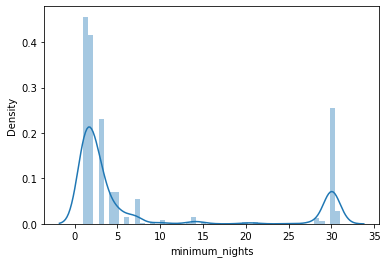

In [8]:
#Checking extreme values

sns.distplot(df['minimum_nights'], bins = 50)

#### 3. Data prep for regression analysis

We will be comparing the minimum number of nights to the price of each Airbnb. Since Airbnb is most commonly used for weekend getaways or one week trips, listings that require a 30-night minimum will be offering a semi-permanent stay and thus likely to charge more since the market is smaller in comparison to those without a number of minimum nights required. Additionally, Airbnb has a long-term housing policy that allows the owners to be very profitable if well-maintained and the guests are timely.

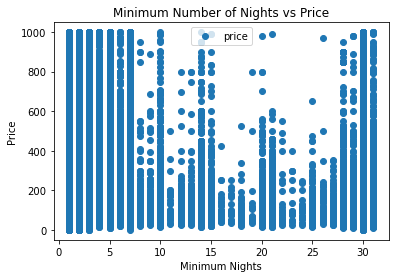

In [9]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'minimum_nights', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Minimum Number of Nights vs Price')  
plt.xlabel('Minimum Nights')  
plt.ylabel('Price')  
plt.show()

In [10]:
#Reshaping variables into NumPy arrays and putting them into separate objects

X = df['minimum_nights'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [11]:
X

array([[ 1],
       [ 1],
       [30],
       ...,
       [ 2],
       [21],
       [ 7]], dtype=int64)

In [12]:
y

array([[ 60],
       [470],
       [ 75],
       ...,
       [240],
       [ 60],
       [ 79]], dtype=int64)

In [13]:
#Splitting the data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 4. Regression analysis

In [14]:
#Create a regression obeject

regression = LinearRegression()

In [15]:
#Fit the regression to the training set

regression.fit(X_train, y_train)

LinearRegression()

In [16]:
#Predict the values of y using X

y_predicted = regression.predict(X_test)

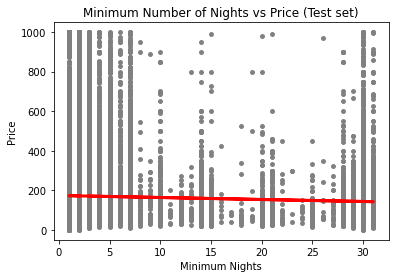

In [17]:
# Creating a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('Minimum Number of Nights vs Price (Test set)')
plot_test.xlabel('Minimum Nights')
plot_test.ylabel('Price')
plot_test.show()

In [18]:
#Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [19]:
#Printing the model summary statistics

print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[-1.00968872]]
Mean squared error:  22271.604587428825
R2 score:  0.005338653803809823


In [20]:
y_predicted

array([[171.95110307],
       [172.96079178],
       [172.96079178],
       ...,
       [169.93172564],
       [143.67981901],
       [170.94141435]])

In [21]:
#Creating a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,55,171.951103
1,71,172.960792
2,100,172.960792
3,105,143.679819
4,999,171.951103
5,77,143.679819
6,69,172.960792
7,72,172.960792
8,93,171.951103
9,99,143.679819


As we can see, the model does not fit well which means that the price does not necessarily increase or decrease with the required minimum amount of nights. 

##### Comparing how the regression fits the training set

In [22]:
y_predicted_train = regression.predict(X_train)

In [23]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.00968872]]
Mean squared error:  22271.604587428825
R2 score:  0.005338653803809823


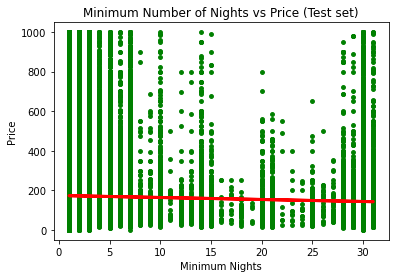

In [24]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Minimum Number of Nights vs Price (Test set)')
plot_test.xlabel('Minimum Nights')
plot_test.ylabel('Price')
plot_test.show()

Ultimately, we can see that there is no correlation between the price and the number of nights. After 14 days, the number of listings with the required minimum number of nights between 15 - 27 goes down drastically along with the price and then spikes back at the one month mark. Unfortunately the model did not end up working on this set however we did discover that it is not consistently more expensive to stay long-term in an Airbnb compared to it's short-term counterpart.